=== Diamond Price Analyzer ===
Data Overview:
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

Missing Values: Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


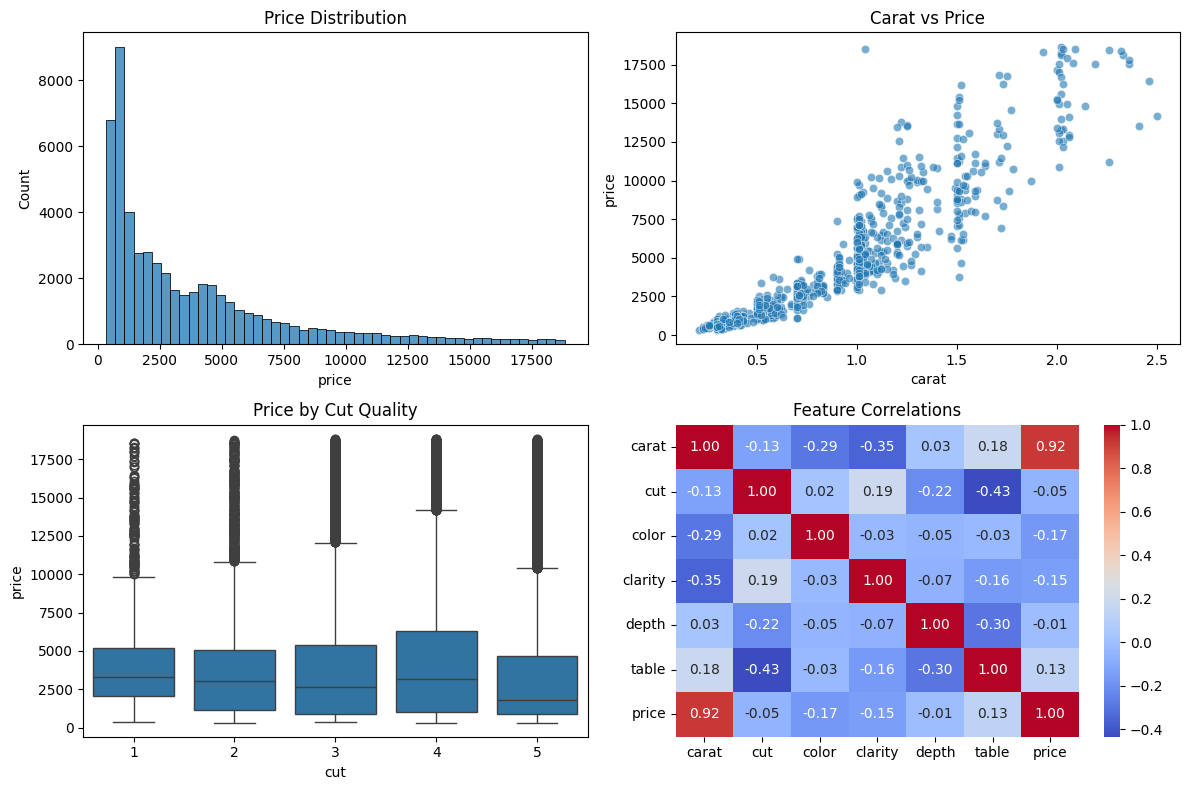


Model Performance: MAE = $280.38

💎 Diamond Price Checker
Enter diamond specifications:
Carat (0.2-5.0): 0.5
Cut (Fair/Good/Very Good/Premium/Ideal): 3
Color (D-J): 3
Clarity (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF): 3
Depth (43-79): 48
Table (48-95): 56

Predicted Fair Price: $1,420.11
Market Average for Similar: $1,540.58


In [ ]:
# diamond analyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

def load_data():
    df = pd.read_csv('/content/sample_data/diamonds.csv (1).zip')
    print("Data Overview:")
    print(df.head())
    print("\nMissing Values:", df.isnull().sum())
    return df

def preprocess(df):
    cut_map = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
    color_map = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
    clarity_map = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

    df['cut'] = df['cut'].map(cut_map)
    df['color'] = df['color'].map(color_map)
    df['clarity'] = df['clarity'].map(clarity_map)

    # Keep only the columns we'll use for modeling
    df = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']]

    return df

def visualize(df):
    plt.figure(figsize=(12,8))

    plt.subplot(2,2,1)
    sns.histplot(df['price'], bins=50, kde=False)
    plt.title('Price Distribution')

    plt.subplot(2,2,2)
    sns.scatterplot(x='carat', y='price', data=df.sample(1000), alpha=0.6)
    plt.title('Carat vs Price')

    plt.subplot(2,2,3)
    sns.boxplot(x='cut', y='price', data=df)
    plt.title('Price by Cut Quality')

    plt.subplot(2,2,4)
    sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Feature Correlations')

    plt.tight_layout()
    plt.show()

def train_model(df):
    X = df.drop('price', axis=1)
    y = df['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    print(f"\nModel Performance: MAE = ${mae:,.2f}")

    return model

def get_float_input(prompt, min_val, max_val):
    while True:
        value = input(prompt)
        try:
            num = float(value)
            if min_val <= num <= max_val:
                return num
            print(f"Please enter a value between {min_val} and {max_val}")
        except ValueError:
            print("Please enter a valid number")

def price_checker(model, df):
    print("\n💎 Diamond Price Checker")
    print("Enter diamond specifications:")

    carat = get_float_input("Carat (0.2-5.0): ", 0.2, 5.0)
    cut = input("Cut (Fair/Good/Very Good/Premium/Ideal): ").title()
    color = input("Color (D-J): ").upper()
    clarity = input("Clarity (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF): ").upper()
    depth = get_float_input("Depth (43-79): ", 43, 79)
    table = get_float_input("Table (48-95): ", 48, 95)

    cut_map = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
    color_map = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
    clarity_map = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

    input_data = pd.DataFrame([[
        carat,
        cut_map.get(cut, 3),  # cut
        color_map.get(color, 4),  # color
        clarity_map.get(clarity, 4),  # clarity
        depth,  # depth
        table  # table
    ]], columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table'])

    predicted_price = model.predict(input_data)[0]
    print(f"\nPredicted Fair Price: ${predicted_price:,.2f}")

    similar = df[
        (df['carat'].between(carat*0.9, carat*1.1)) &
        (df['cut'] == cut_map.get(cut, 3)) &
        (df['color'] == color_map.get(color, 4))
    ]

    if not similar.empty:
        avg_price = similar['price'].mean()
        print(f"Market Average for Similar: ${avg_price:,.2f}")
        if predicted_price > avg_price * 1.15:
            print("⚠️ Warning: Predicted price seems higher than market average")

if __name__ == "__main__":
    print("=== Diamond Price Analyzer ===")
    df = load_data()
    df = preprocess(df)
    visualize(df)
    model = train_model(df)

    while True:
        price_checker(model, df)
        if input("\nCheck another diamond? (y/n): ").lower() != 'y':
            break